In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("CC General.csv")
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
numerical_features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

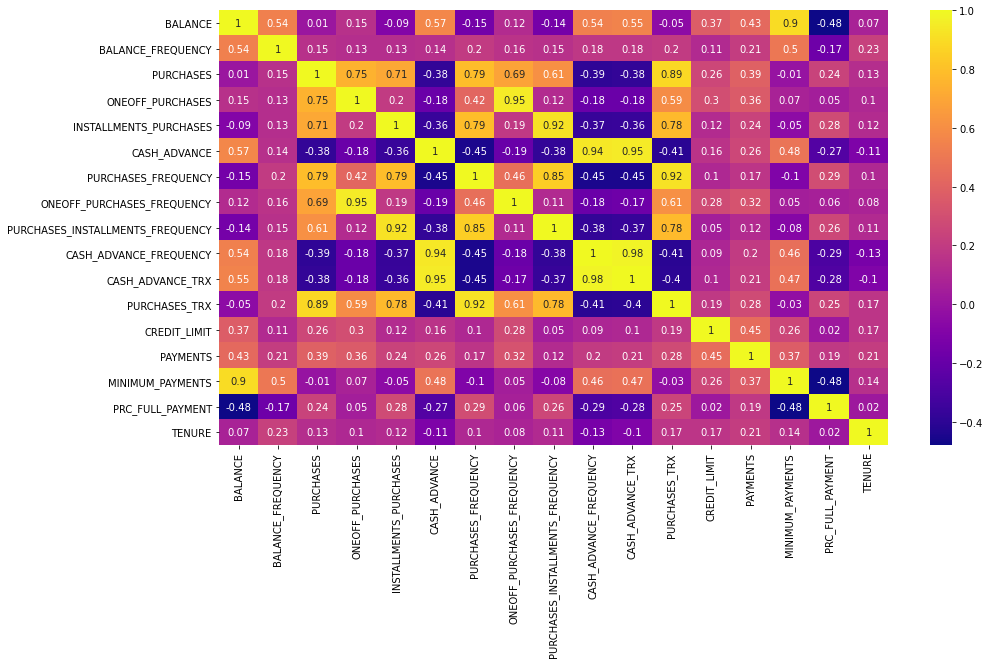

In [7]:
plt.figure(figsize=(15, 8))
sns.heatmap(round(data[numerical_features].corr(method='spearman'), 2), 
            annot=True, mask=None, cmap='plasma')
plt.show()

In [8]:
corr_mat = data[numerical_features].corr()
corr_mat = corr_mat.unstack()
corr_mat = corr_mat.sort_values(kind="quicksort").drop_duplicates()
corr_mat[corr_mat>0.5]

PURCHASES_FREQUENCY               ONEOFF_PURCHASES_FREQUENCY    0.501343
PURCHASES_INSTALLMENTS_FREQUENCY  INSTALLMENTS_PURCHASES        0.511351
ONEOFF_PURCHASES_FREQUENCY        ONEOFF_PURCHASES              0.524891
PURCHASES_INSTALLMENTS_FREQUENCY  PURCHASES_TRX                 0.529975
CREDIT_LIMIT                      BALANCE                       0.531283
PURCHASES_TRX                     ONEOFF_PURCHASES_FREQUENCY    0.544869
                                  ONEOFF_PURCHASES              0.545523
PAYMENTS                          ONEOFF_PURCHASES              0.567292
PURCHASES_FREQUENCY               PURCHASES_TRX                 0.568430
PAYMENTS                          PURCHASES                     0.603264
PURCHASES_TRX                     INSTALLMENTS_PURCHASES        0.628108
CASH_ADVANCE                      CASH_ADVANCE_FREQUENCY        0.628522
                                  CASH_ADVANCE_TRX              0.656498
INSTALLMENTS_PURCHASES            PURCHASES        

In [9]:
missingValueFeatures = pd.DataFrame({'missing %': data.isnull().sum()*100/len(data)})
missingValueFeatures[missingValueFeatures['missing %']>0]

,missing %
CREDIT_LIMIT,0.011173
MINIMUM_PAYMENTS,3.497207


In [10]:
# Imputing CREDIT_LIMIT & MINIMUM_PAYMENTS as per BALANCE
print('Before Imputation:')
print(data[['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']].describe().T)

data.sort_values(by='BALANCE', inplace=True)
# now use backfill method to replace
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(), inplace=True)
data['MINIMUM_PAYMENTS'].fillna(method='bfill', inplace=True)

print('\nAfter Imputation:')
print(data[['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']].describe().T)

Before Imputation:
                   count         mean          std        min          25%  \
CREDIT_LIMIT      8949.0  4494.449450  3638.815725  50.000000  1600.000000   
MINIMUM_PAYMENTS  8637.0   864.206542  2372.446607   0.019163   169.123707   

                          50%          75%          max  
CREDIT_LIMIT      3000.000000  6500.000000  30000.00000  
MINIMUM_PAYMENTS   312.343947   825.485459  76406.20752  

After Imputation:
                   count         mean          std        min          25%  \
CREDIT_LIMIT      8950.0  4494.449450  3638.612411  50.000000  1600.000000   
MINIMUM_PAYMENTS  8950.0   843.323173  2335.737040   0.019163   165.719355   

                          50%          75%          max  
CREDIT_LIMIT      3000.000000  6500.000000  30000.00000  
MINIMUM_PAYMENTS   297.559478   796.951391  76406.20752  


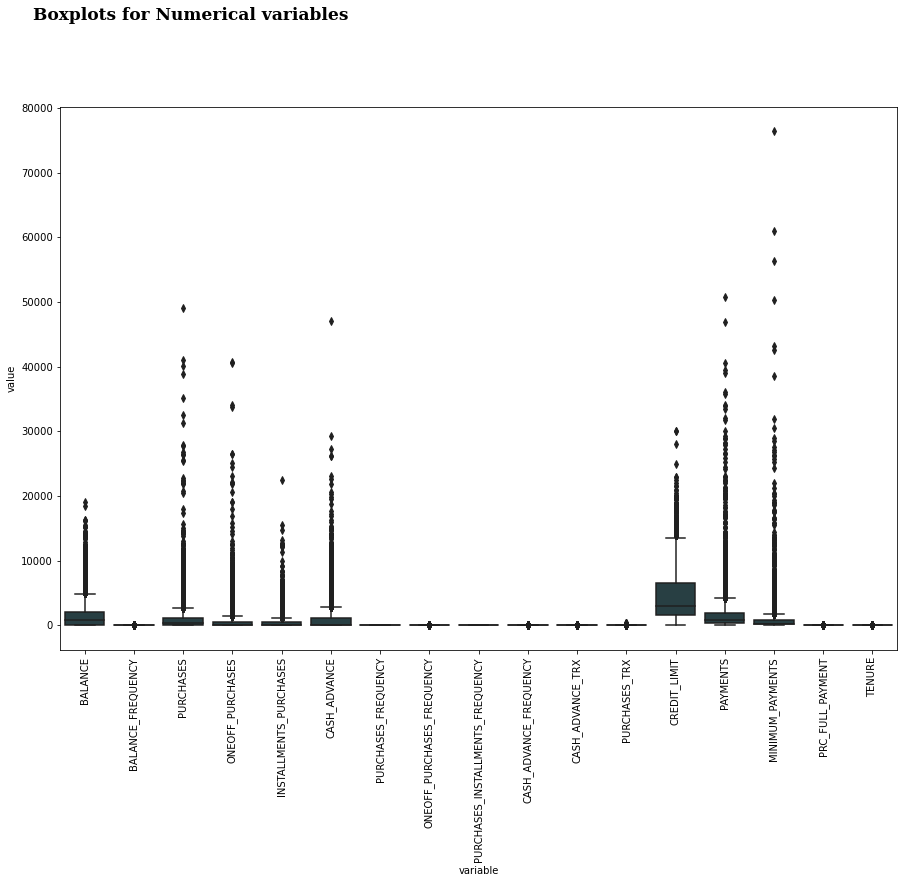

In [11]:
NumericData = data[[feature for feature in numerical_features if feature not in []]]
NumericMelt = NumericData.melt()
plt.figure(figsize=(15,10))

plt.figtext(0.1, 1, "Boxplots for Numerical variables", fontfamily='serif', fontsize=17, 
            fontweight='bold')

bp = sns.boxplot(x='variable', y='value', data=NumericMelt, 
                 palette=['#244247']*len(numerical_features))

bp.set_xticklabels(bp.get_xticklabels(), rotation=90)
plt.show()

In [12]:
outlier_percentage = {}

for feature in numerical_features:
    tempData = data.sort_values(by=feature)[feature]
    Q1, Q3 = tempData.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    Lower_range = Q1 - (1.5 * IQR)
    Upper_range = Q3 + (1.5 * IQR)
    outlier_percentage[feature] = round((((tempData<(Q1 - 1.5 * IQR)) | 
                                          (tempData>(Q3 + 1.5 * IQR))).sum()/tempData.shape[0])*100,2)

    outlier_percentage

{'BALANCE': 7.77,
 'BALANCE_FREQUENCY': 16.68,
 'PURCHASES': 9.03,
 'ONEOFF_PURCHASES': 11.32,
 'INSTALLMENTS_PURCHASES': 9.69,
 'CASH_ADVANCE': 11.51,
 'PURCHASES_FREQUENCY': 0.0,
 'ONEOFF_PURCHASES_FREQUENCY': 8.74,
 'PURCHASES_INSTALLMENTS_FREQUENCY': 0.0,
 'CASH_ADVANCE_FREQUENCY': 5.87,
 'CASH_ADVANCE_TRX': 8.98,
 'PURCHASES_TRX': 8.56,
 'CREDIT_LIMIT': 2.77,
 'PAYMENTS': 9.03,
 'MINIMUM_PAYMENTS': 9.99,
 'PRC_FULL_PAYMENT': 16.47,
 'TENURE': 15.26}

## KMeans

In [13]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [14]:
from sklearn.cluster import KMeans
feature_cols = [feature for feature in data.columns if feature not in(['CUST_ID'])]
train_data = data.copy()[feature_cols]
print('features used- ', feature_cols)

features used-  ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


In [15]:
# rescaling data
scale = StandardScaler()
train_data = scale.fit_transform(train_data)

In [16]:
model = KMeans(n_clusters=7, init='k-means++', random_state=0, algorithm='elkan')
y = model.fit_predict(train_data)

In [19]:
def plot_num_cat(feature, target, figsize=None):
    fig = plt.figure(figsize=(15,6))

    for value in data[target].unique():
        sns.kdeplot(data[data[target]==value][feature])

    fig.legend(labels=data[target].unique())
    plt.title('{} distribution based on {}'.format(feature, target))
    plt.show()

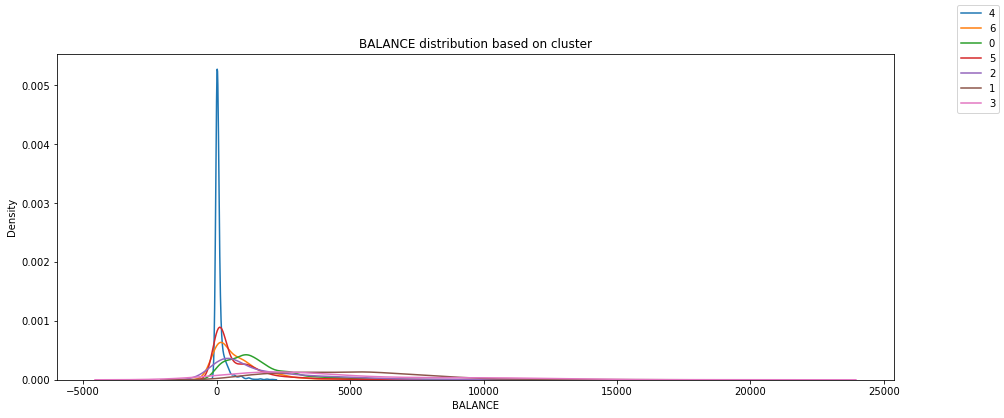

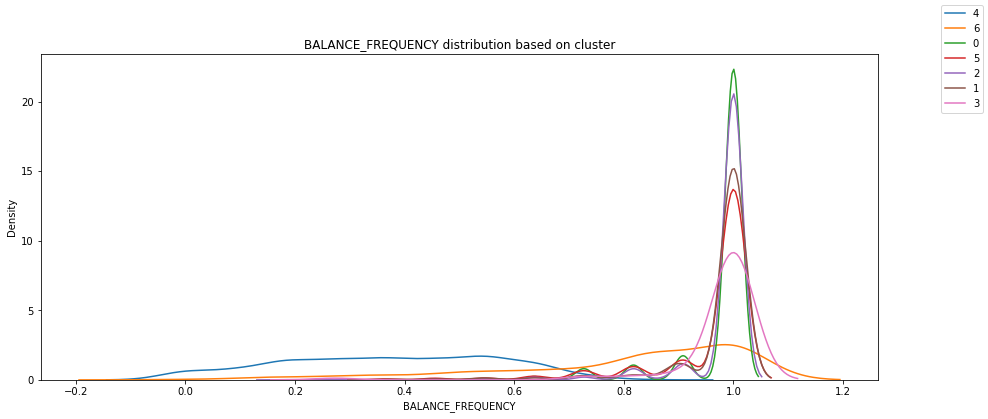

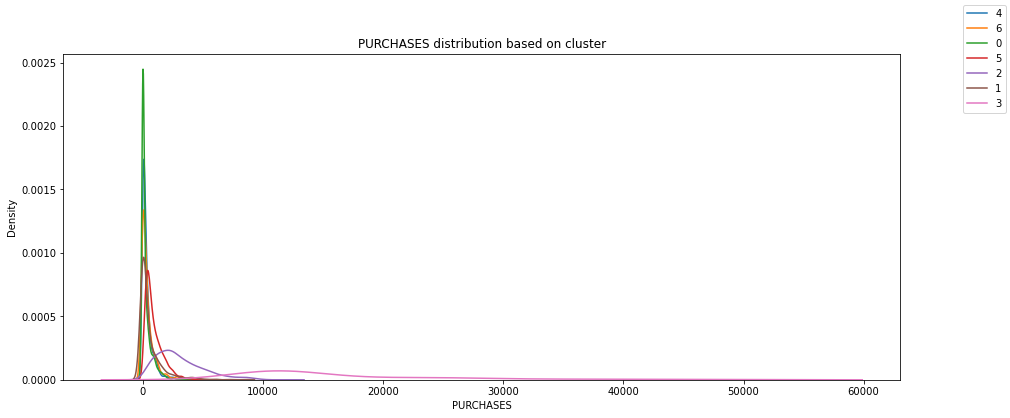

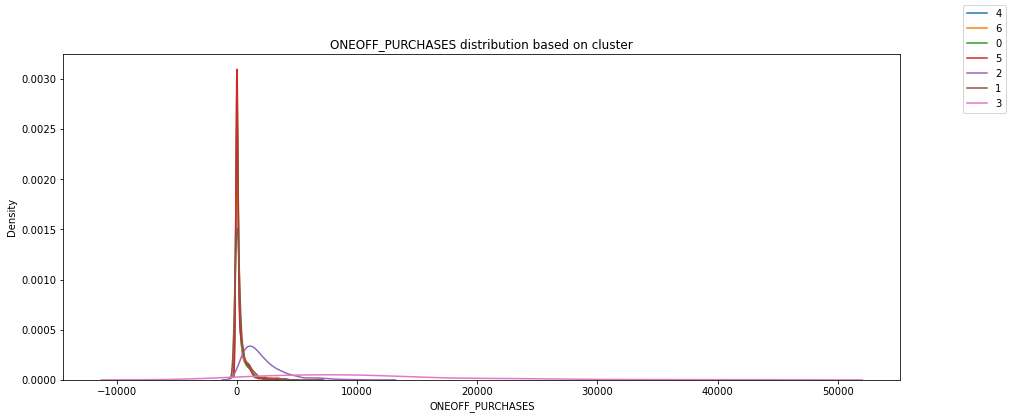

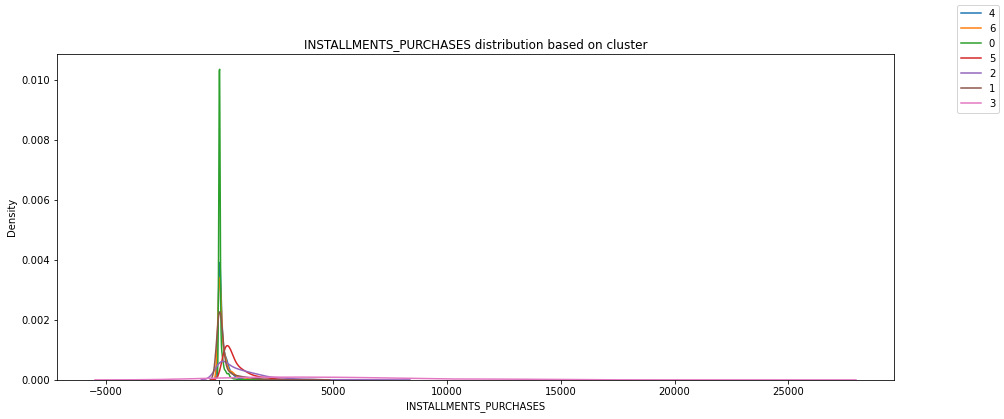

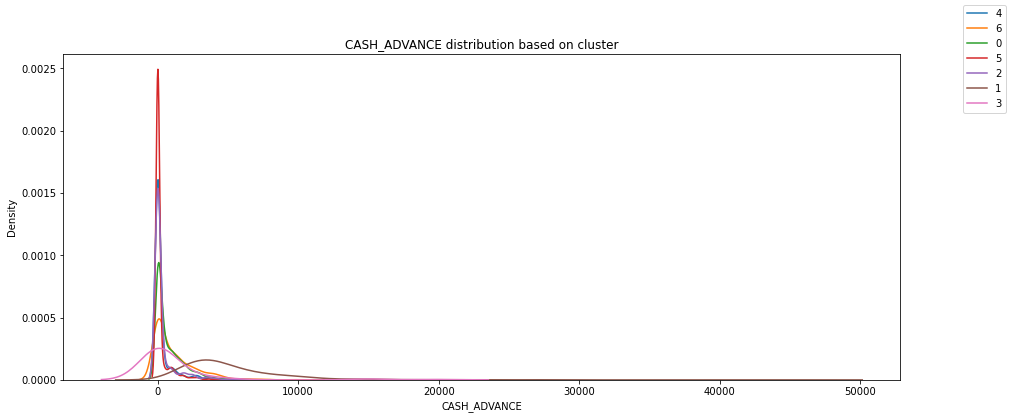

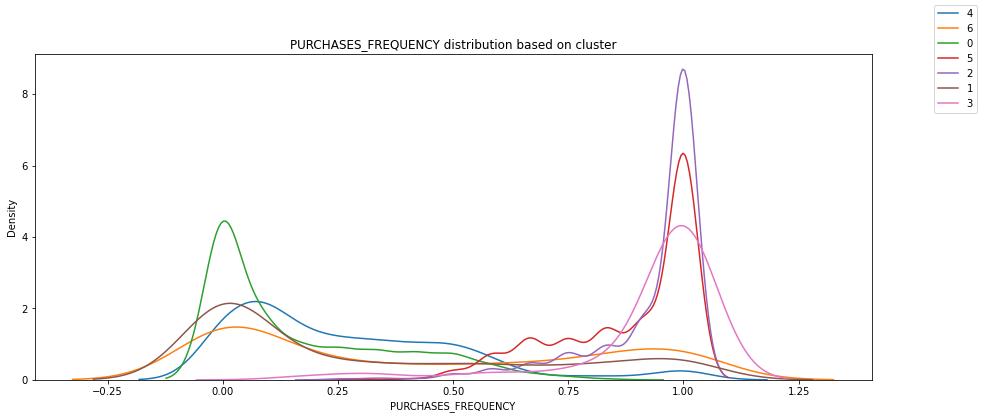

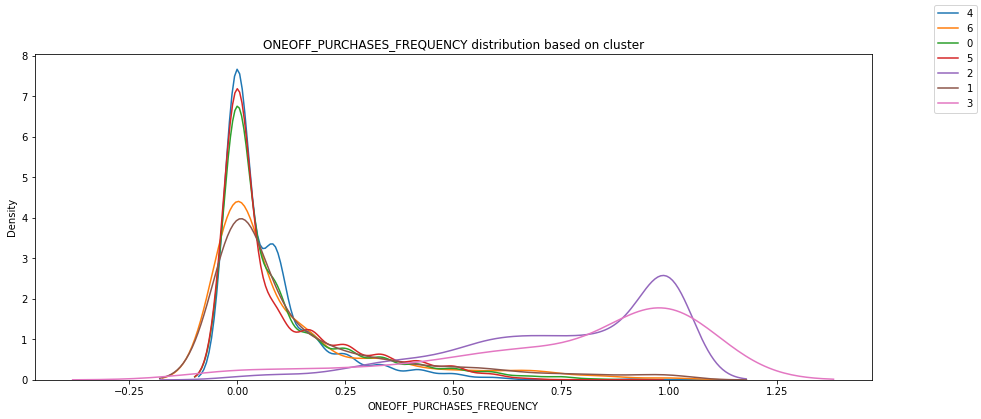

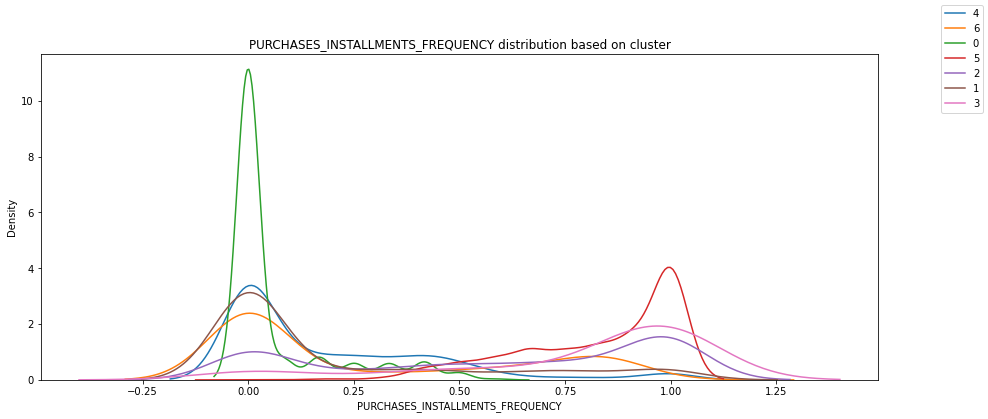

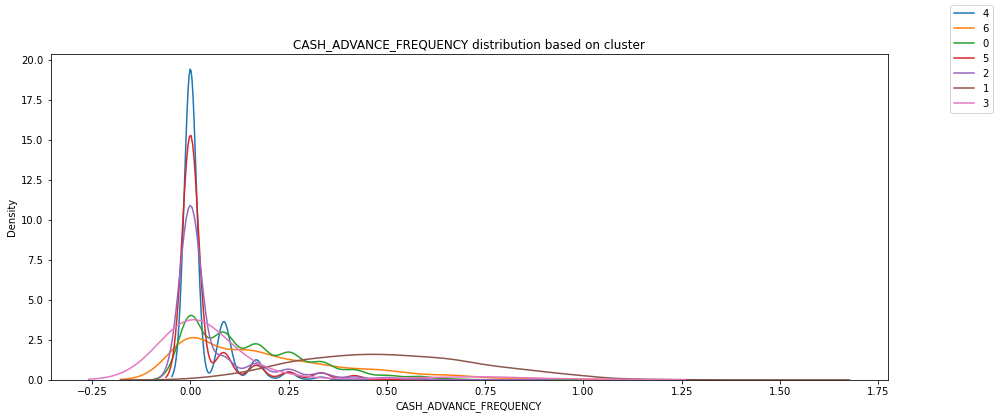

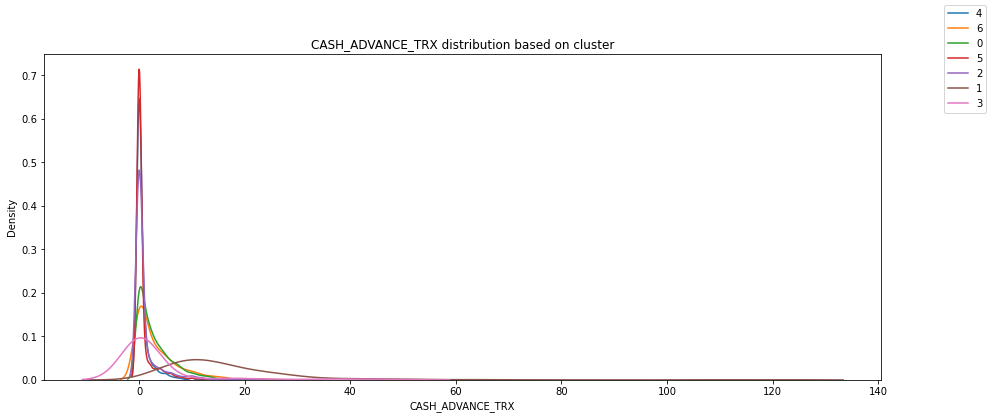

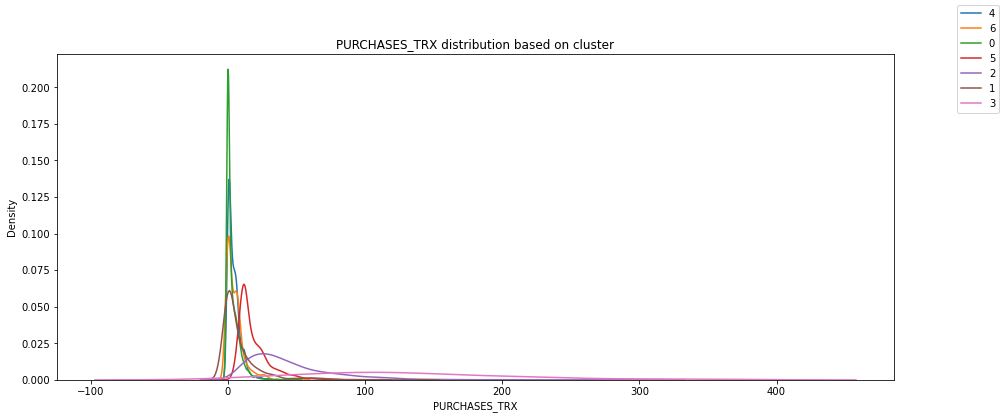

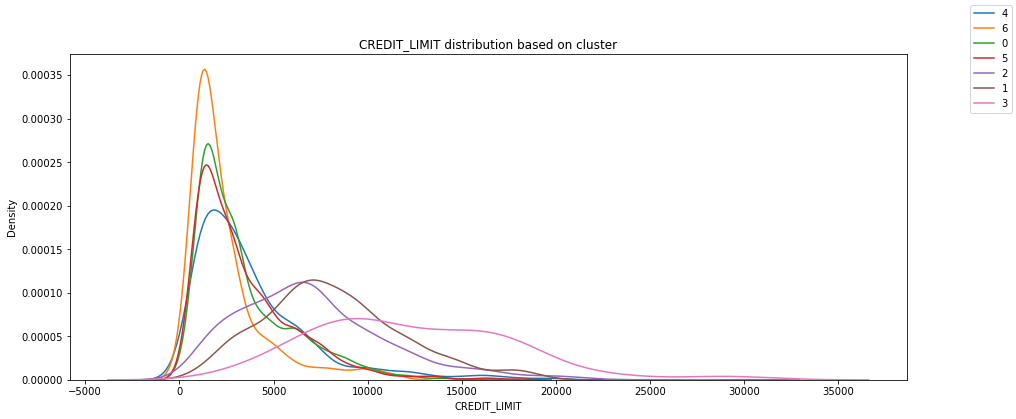

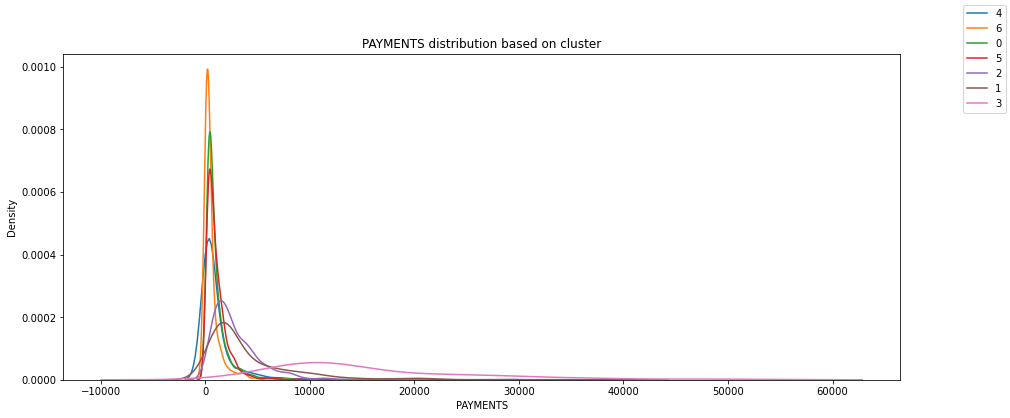

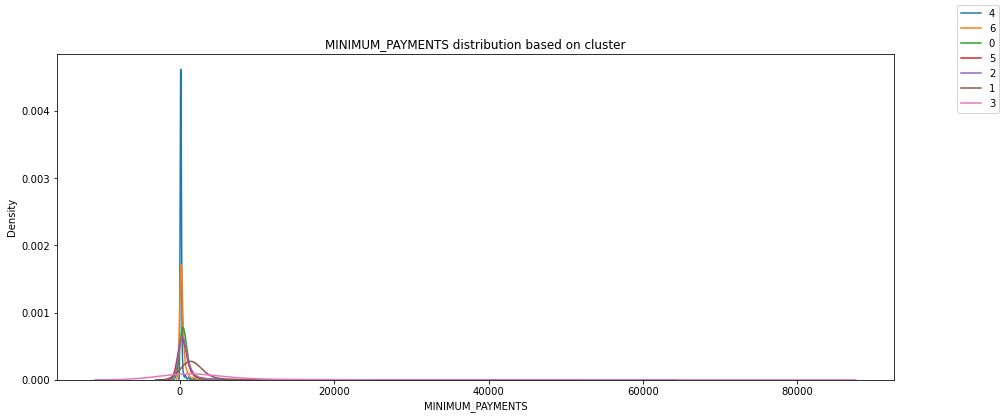

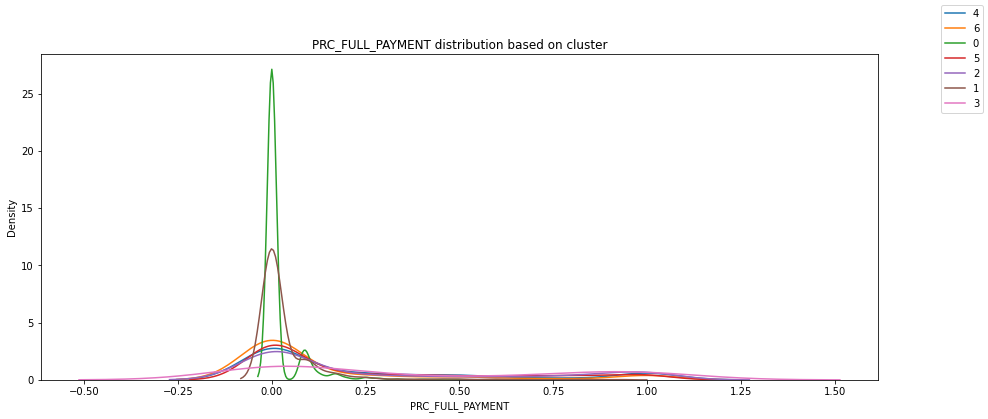

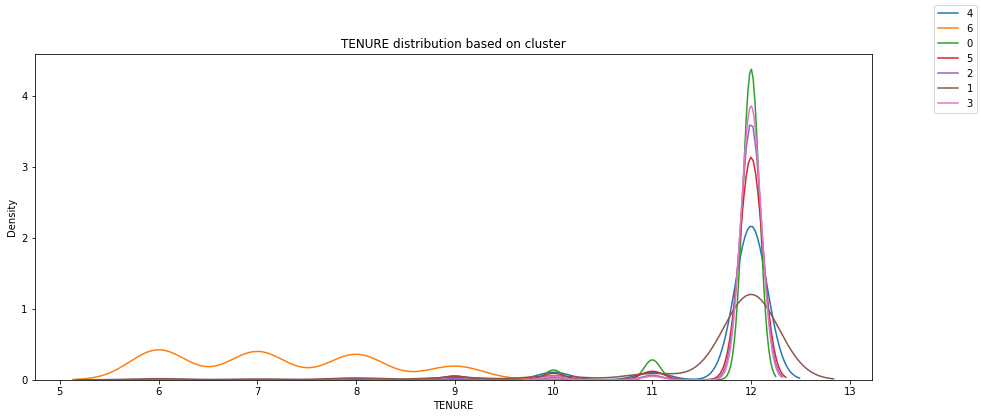

In [20]:
data['cluster'] = y
for feature in numerical_features:
    plot_num_cat(feature, 'cluster')

## Gaussian Mixture

In [21]:
from sklearn.mixture import GaussianMixture

# Number of clusters is determined using elbow method above
model = GaussianMixture(n_components=7)
y = model.fit_predict(train_data)

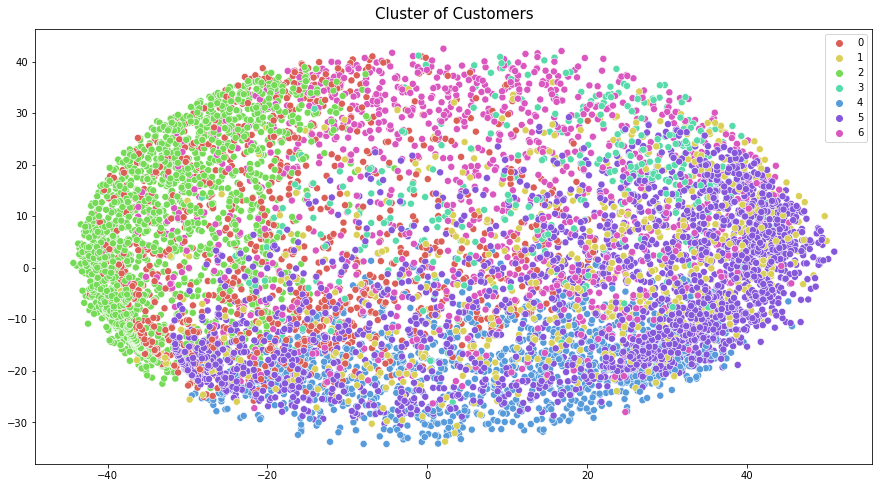

In [24]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

dist = 1-cosine_similarity(train_data)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)

# Visualizing all the clusters 
plt.figure(figsize=(15,8))
sns.scatterplot(x=X_PCA[:, 0], y=X_PCA[:, 1], 
                hue=y, palette=sns.color_palette('hls', len(np.unique(y))), s=50)
plt.title('Cluster of Customers', size=15, pad=10)
plt.legend(loc=0, bbox_to_anchor=[1,1])
plt.show()